In [1]:
from numpy import genfromtxt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [2]:
images = genfromtxt('images.csv', delimiter=',')
labels = genfromtxt('labels.csv', delimiter=',')
images = images.reshape(images.shape[0], 28,28)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(images,
                                                        labels,
                                                        test_size=0.33,
                                                        stratify=labels)

In [4]:
#Use ImageDataGenerator to increase data size
image_gen = ImageDataGenerator(rotation_range=10, # rotate the image 10 degrees
                                   width_shift_range=0.10, # Shift the pic width by a max of 5%
                                   height_shift_range=0.10, # Shift the pic height by a max of 5%
                                   zoom_range=0.5, # Zoom in by 5% max
                                   fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                                   )

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
image_gen.fit(X_train)

In [6]:
model = Sequential()
model.add(Conv2D(16, 7, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam')

In [12]:
epochs = 300
patience = 10
val_losses = []
min_val_loss = model.evaluate(X_test, y_test)
loss_ind = 0

for e in range(epochs):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in image_gen.flow(X_train, y_train, batch_size=32):
        model.fit(x_batch, y_batch)
        batches += 1
        if batches >= len(X_train) / 32:
            break
    
    #EarlyStopping
    curr_loss = model.evaluate(X_test, y_test)
    val_losses.append(curr_loss)
    if  curr_loss < min_val_loss:
        min_val_loss = curr_loss
        loss_ind = 0
        model.save_weights('best_weights.h5')
    else:
        loss_ind += 1
        if loss_ind == patience:
            break

3/3 [==============================] - 0s 4ms/step - loss: 0.4782
Epoch 0
3/3 [==============================] - 0s 3ms/step - loss: 0.3204
Epoch 1
3/3 [==============================] - 0s 4ms/step - loss: 0.3107
Epoch 2
3/3 [==============================] - 0s 3ms/step - loss: 0.3031
Epoch 3
3/3 [==============================] - 0s 3ms/step - loss: 0.4049
Epoch 4
3/3 [==============================] - 0s 3ms/step - loss: 0.3529
Epoch 5
3/3 [==============================] - 0s 3ms/step - loss: 0.3406
Epoch 6
3/3 [==============================] - 0s 3ms/step - loss: 0.3238
Epoch 7
3/3 [==============================] - 0s 2ms/step - loss: 0.3103
Epoch 8
3/3 [==============================] - 0s 4ms/step - loss: 0.2532
Epoch 9
3/3 [==============================] - 0s 3ms/step - loss: 0.2573
Epoch 10
3/3 [==============================] - 0s 4ms/step - loss: 0.2478
Epoch 11
3/3 [==============================] - 0s 5ms/step - loss: 0.2440
Epoch 12
3/3 [==============================

3/3 [==============================] - 0s 3ms/step - loss: 0.1533
Epoch 20
3/3 [==============================] - 0s 5ms/step - loss: 0.1365
Epoch 21
3/3 [==============================] - 0s 4ms/step - loss: 0.1354
Epoch 22
3/3 [==============================] - 0s 3ms/step - loss: 0.1259
Epoch 23
3/3 [==============================] - 0s 3ms/step - loss: 0.1229
Epoch 24
3/3 [==============================] - 0s 3ms/step - loss: 0.1291
Epoch 25
3/3 [==============================] - 0s 2ms/step - loss: 0.1510
Epoch 26
3/3 [==============================] - 0s 3ms/step - loss: 0.1460
Epoch 27
3/3 [==============================] - 0s 3ms/step - loss: 0.1338
Epoch 28
3/3 [==============================] - 0s 4ms/step - loss: 0.1458
Epoch 29
3/3 [==============================] - 0s 3ms/step - loss: 0.1736
Epoch 30
3/3 [==============================] - 0s 3ms/step - loss: 0.1355
Epoch 31
3/3 [==============================] - 0s 4ms/step - loss: 0.1094
Epoch 32
3/3 [====================

3/3 [==============================] - 0s 3ms/step - loss: 0.1110
Epoch 40
3/3 [==============================] - 0s 3ms/step - loss: 0.1065
Epoch 41
3/3 [==============================] - 0s 3ms/step - loss: 0.1439
Epoch 42
3/3 [==============================] - 0s 3ms/step - loss: 0.1184
Epoch 43
3/3 [==============================] - 0s 3ms/step - loss: 0.1530
Epoch 44
3/3 [==============================] - 0s 3ms/step - loss: 0.1504
Epoch 45
3/3 [==============================] - 0s 3ms/step - loss: 0.1359
Epoch 46
3/3 [==============================] - 0s 3ms/step - loss: 0.1051
Epoch 47
3/3 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 48
3/3 [==============================] - 0s 3ms/step - loss: 0.0755
Epoch 49
3/3 [==============================] - 0s 3ms/step - loss: 0.3224
Epoch 50
3/3 [==============================] - 0s 3ms/step - loss: 0.1364
Epoch 51
3/3 [==============================] - 0s 3ms/step - loss: 0.1295
Epoch 52
3/3 [====================

In [13]:
import matplotlib.pyplot as plt

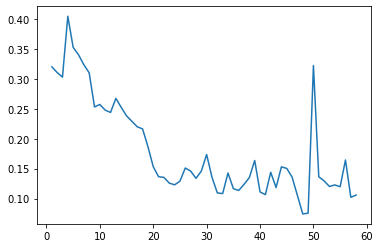

In [14]:
#val_loss over epochs
x = range(1, len(val_losses) + 1)
plt.plot(x, val_losses)

In [15]:
model.load_weights('best_weights.h5')

In [16]:
model.save("model")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model\assets
